# Q1) Import the necessary libraries and read the data as a data frame

In [71]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [72]:
df=pd.read_csv('bank-full.csv')

Data Frame is read as df

# Q2)Perform basic EDA which should include the following and print out your insights at every step.

In [73]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Shape and data type of the data

In [74]:
df.shape

(45211, 17)

dataset is having 16 features with 1 as target

# Check info of the dataset

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


There are some objects which are object type which needs to be converted into int

In [76]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
df['job']=label_encoder.fit_transform(df['job']) 
df['marital']=label_encoder.fit_transform(df['marital']) 
df['education']=label_encoder.fit_transform(df['education']) 
df['default']=label_encoder.fit_transform(df['default'])
df['housing']=label_encoder.fit_transform(df['housing'])
df['loan']=label_encoder.fit_transform(df['loan'])
df['contact']=label_encoder.fit_transform(df['contact'])
df['month']=label_encoder.fit_transform(df['month'])
df['poutcome']=label_encoder.fit_transform(df['poutcome'])
df['Target']=df.Target.map({'yes':1,'no':0})








# Report statistical summary of the dataset

In [77]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
job,45211.0,4.339762,3.272657,0.0,1.0,4.0,7.0,11.0
marital,45211.0,1.167725,0.608230,0.0,1.0,1.0,2.0,2.0
education,45211.0,1.224813,0.747997,0.0,1.0,1.0,2.0,3.0
default,45211.0,0.018027,0.133049,0.0,0.0,0.0,0.0,1.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
housing,45211.0,0.555838,0.496878,0.0,0.0,1.0,1.0,1.0
loan,45211.0,0.160226,0.366820,0.0,0.0,0.0,0.0,1.0
contact,45211.0,0.640242,0.897951,0.0,0.0,0.0,2.0,2.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0


The distribution of few variables seems to be skewed and presence of outliers is also seen

# Check the presence of missing values and impute if there is any

In [78]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

No missing values

# Checking the presence of outliers and impute if there is any

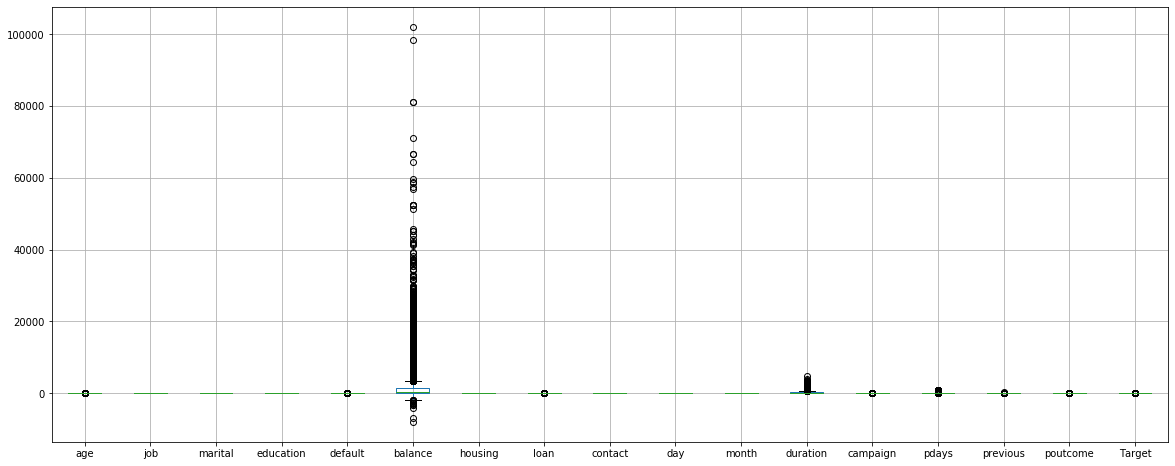

In [79]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20, 8))
df.boxplot() #for plotting boxplots for all the numerical columns in the df

plt.show()

There is presences of outliers in balance,age,duration,campaign,pdays & previous.This is explored in other plots individually.

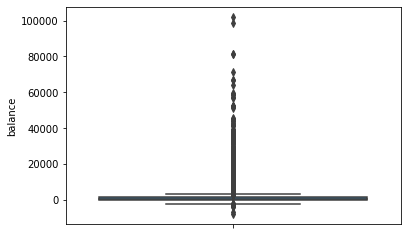

In [80]:

ax = sns.boxplot(y=df['balance'])

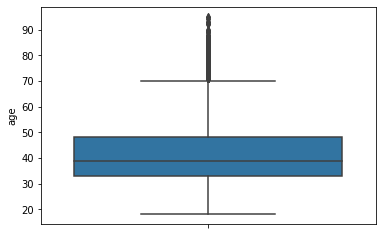

In [81]:

ax = sns.boxplot(y=df['age'])

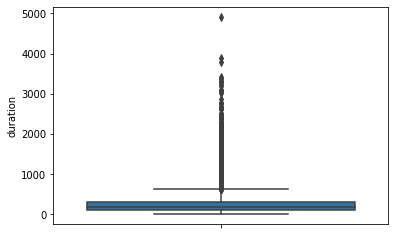

In [82]:

ax = sns.boxplot(y=df['duration'])

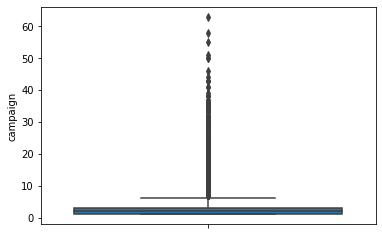

In [83]:

ax = sns.boxplot(y=df['campaign'])

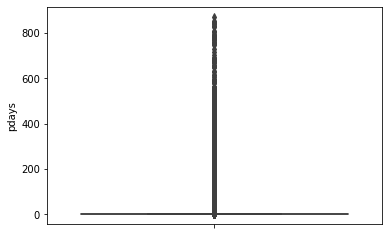

In [84]:

ax = sns.boxplot(y=df['pdays'])

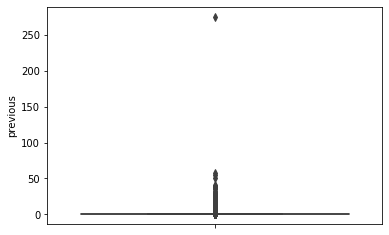

In [85]:

ax = sns.boxplot(y=df['previous'])

Imputing outliers

In [86]:
#for value in colname:
q1 = df['balance'].quantile(0.25) #first quartile value
q3 = df['balance'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

In [87]:

df['balance'] = np.where((df.balance < low),low,df.balance)
df['balance'] = np.where((df.balance >high),high,df.balance)

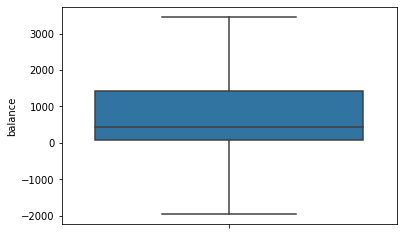

In [88]:

ax = sns.boxplot(y=df['balance'])

In [89]:
#for value in colname:
q1 = df['age'].quantile(0.25) #first quartile value
q3 = df['age'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

In [90]:

df['age'] = np.where((df.age < low),low,df.age)
df['age'] = np.where((df.age >high),high,df.age)

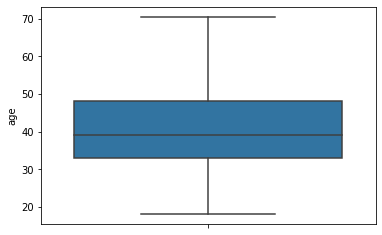

In [91]:

ax = sns.boxplot(y=df['age'])

In [92]:
#for value in colname:
q1 = df['duration'].quantile(0.25) #first quartile value
q3 = df['duration'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

df['duration'] = np.where((df.duration < low),low,df.duration)
df['duration'] = np.where((df.duration >high),high,df.duration)

In [93]:
#for value in colname:
q1 = df['campaign'].quantile(0.25) #first quartile value
q3 = df['campaign'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

df['campaign'] = np.where((df.campaign < low),low,df.campaign)
df['campaign'] = np.where((df.campaign >high),high,df.campaign)

In [94]:
#for value in colname:
q1 = df['pdays'].quantile(0.25) #first quartile value
q3 = df['pdays'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

df['pdays'] = np.where((df.pdays < low),low,df.pdays)
df['pdays'] = np.where((df.pdays >high),high,df.pdays)

In [95]:
#for value in colname:
q1 = df['previous'].quantile(0.25) #first quartile value
q3 = df['previous'].quantile(0.75) # third quartile value
iqr = q3-q1 #Interquartile range
low  = q1-1.5*iqr #acceptable range
high = q3+1.5*iqr #acceptable range

df['previous'] = np.where((df.previous < low),low,df.previous)
df['previous'] = np.where((df.previous >high),high,df.previous)

# Report the distribution of independent variables.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000229EA224448>,
      dtype=object)

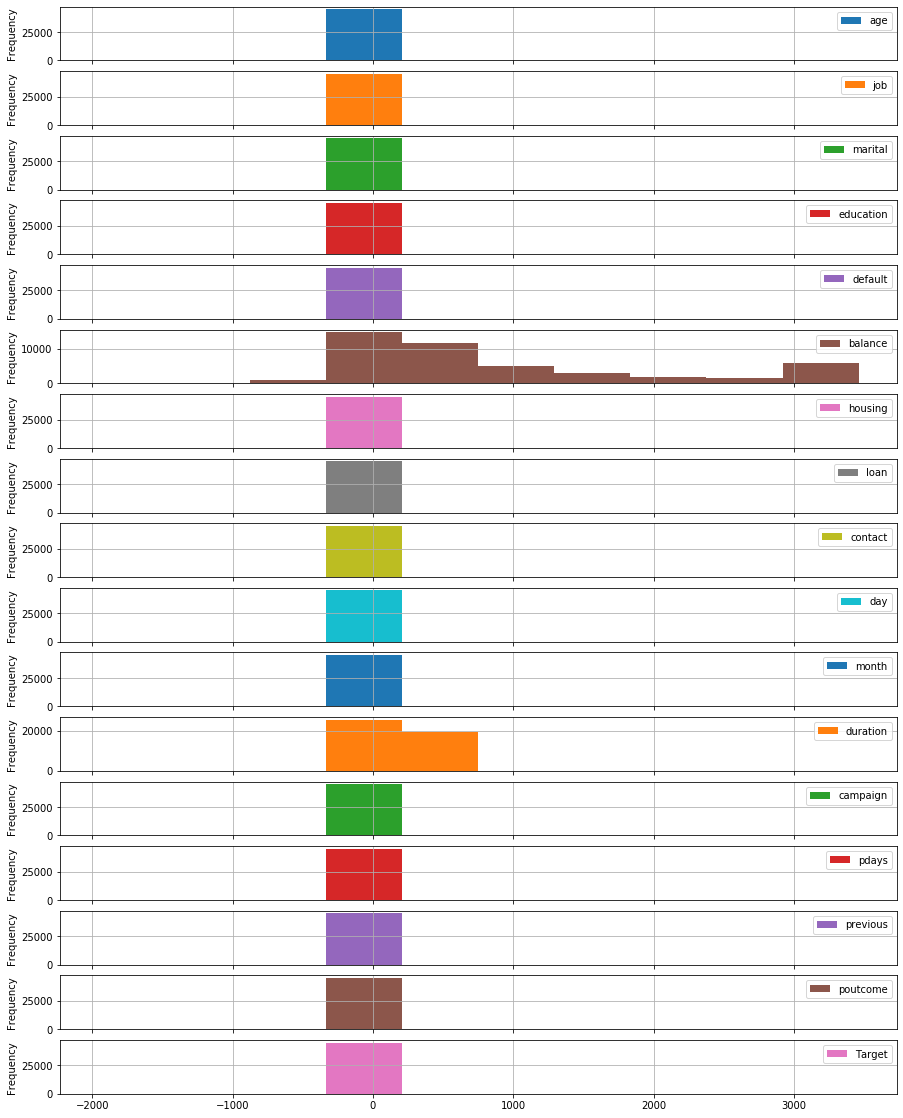

In [27]:
df.plot.hist( subplots = True, grid = True,figsize = (15,20))


Balance distributions seems to right skewed and frequemcy also.

# Check frequency distribution of target feature and comment on your findings.

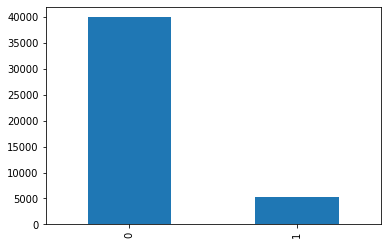

In [63]:
fig, ax = plt.subplots()
df['Target'].value_counts().plot(ax=ax, kind='bar')

There are approximately 10x more examples of cases with 0

# Perform bivariate analysis using pairplot and mention your findings

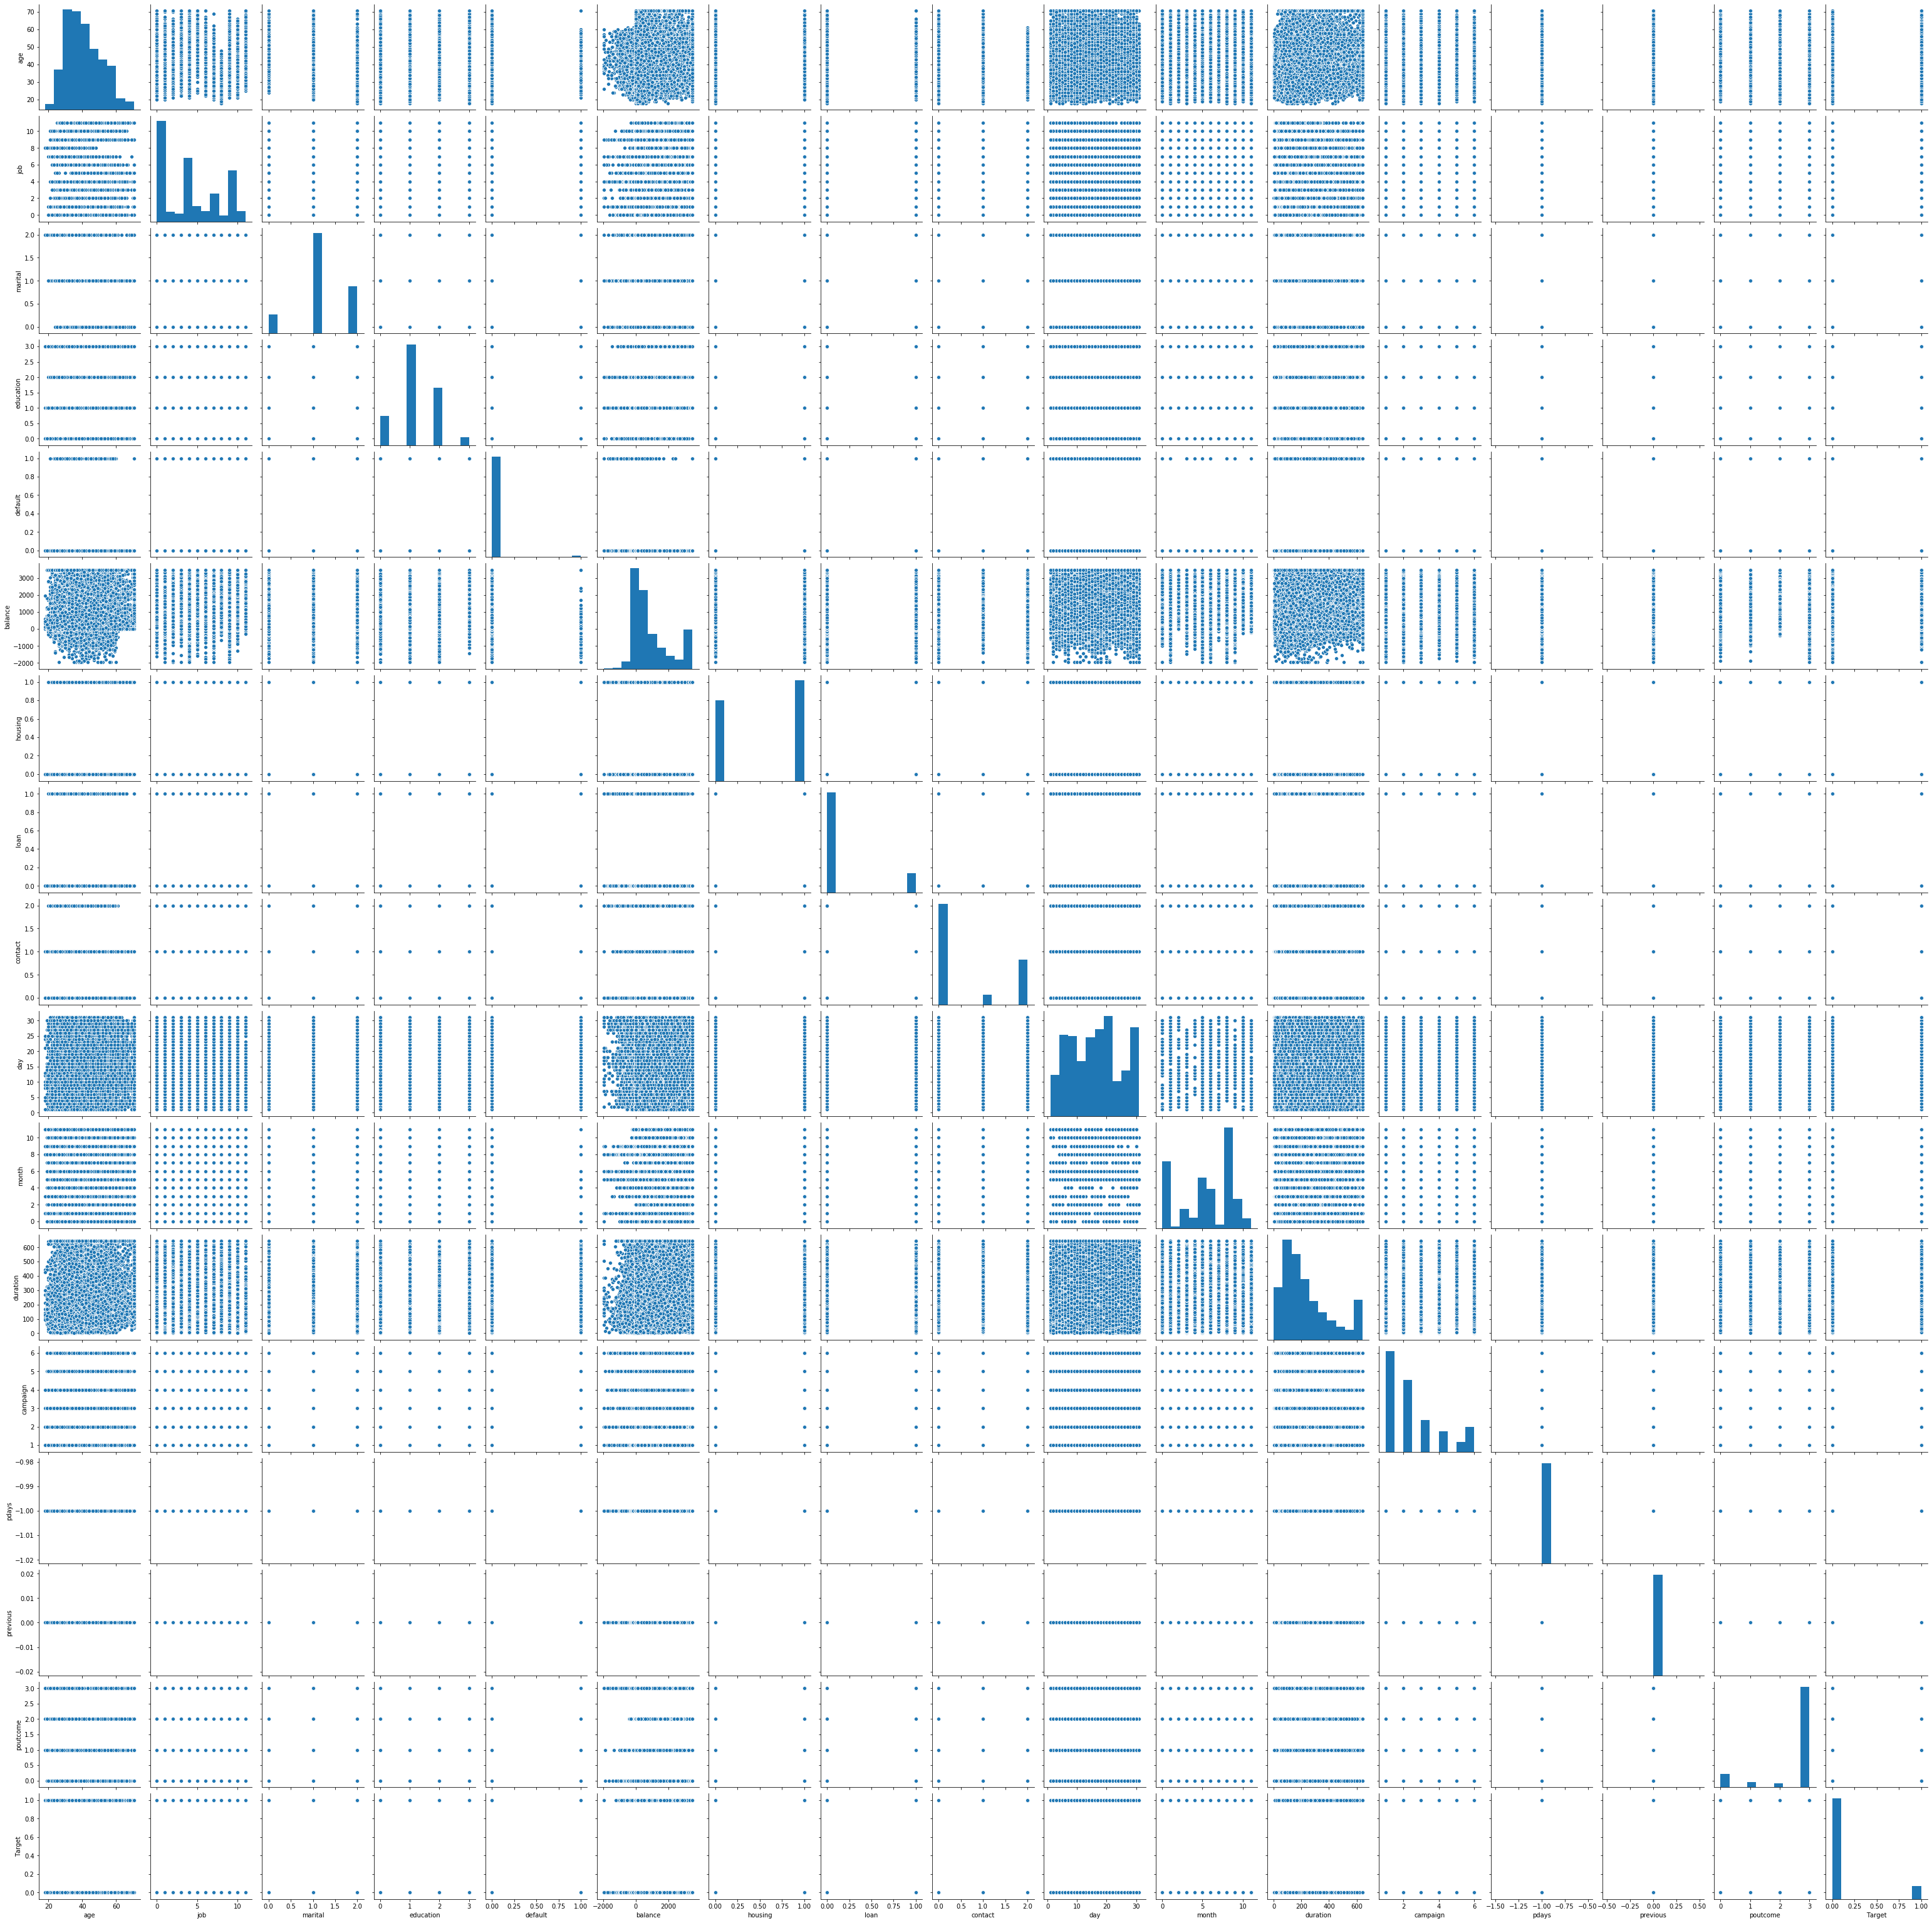

In [28]:
sns.pairplot(df)

Job martial status and default show relation with Target variable.Rest there is no linear relationship.As they are categorical so decsion trees might be good classifier.

# Check correlation among independent features and mention if there is any collinearity.

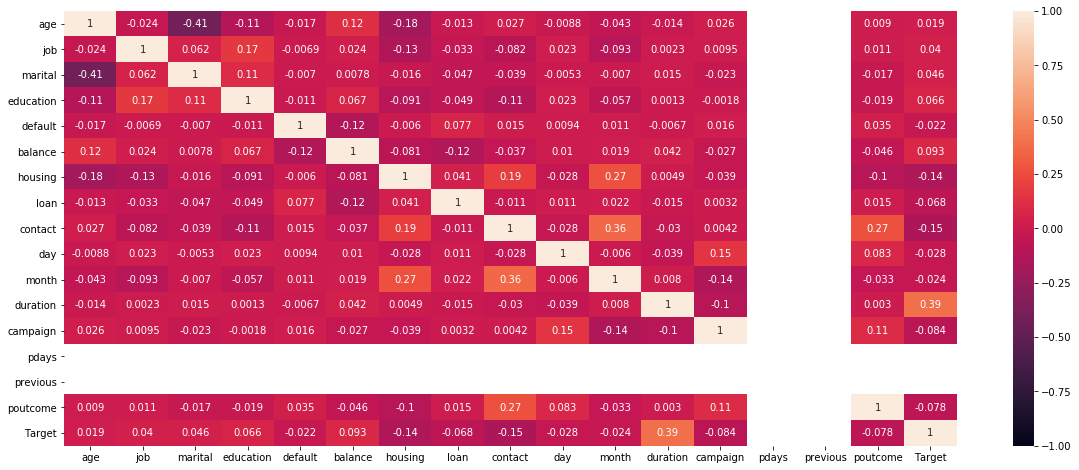

In [29]:
corr=df.corr() 
plt.figure(figsize=(20, 8))
sns.heatmap(corr,  vmax=1.0, vmin=-1.0, annot = True)


There is no significant linear collinearity with target variables.

In [30]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
age,1.000000,-0.023540,-0.407372,-0.105908,-0.017386,0.121527,-0.182389,-0.013154,0.027446,-0.008843,-0.043238,-0.014287,0.025791,NaN,NaN,0.009048,0.018976
job,-0.023540,1.000000,0.062045,0.166707,-0.006853,0.023913,-0.125363,-0.033004,-0.082063,0.022856,-0.092870,0.002272,0.009462,NaN,NaN,0.011010,0.040438
marital,-0.407372,0.062045,1.000000,0.108576,-0.007023,0.007754,-0.016096,-0.046893,-0.039201,-0.005261,-0.006991,0.014829,-0.022779,NaN,NaN,-0.016850,0.045588
education,-0.105908,0.166707,0.108576,1.000000,-0.010718,0.067476,-0.090790,-0.048574,-0.110928,0.022671,-0.057304,0.001252,-0.001767,NaN,NaN,-0.019361,0.066241
default,-0.017386,-0.006853,-0.007023,-0.010718,1.000000,-0.123657,-0.006025,0.077234,0.015404,0.009424,0.011486,-0.006710,0.015827,NaN,NaN,0.034898,-0.022419
balance,0.121527,0.023913,0.007754,0.067476,-0.123657,1.000000,-0.080840,-0.119742,-0.037029,0.009971,0.018928,0.041942,-0.026531,NaN,NaN,-0.046272,0.092924
housing,-0.182389,-0.125363,-0.016096,-0.090790,-0.006025,-0.080840,1.000000,0.041323,0.188123,-0.027982,0.271481,0.004855,-0.038689,NaN,NaN,-0.099971,-0.139173
loan,-0.013154,-0.033004,-0.046893,-0.048574,0.077234,-0.119742,0.041323,1.000000,-0.010873,0.011370,0.022145,-0.015421,0.003230,NaN,NaN,0.015458,-0.068185
contact,0.027446,-0.082063,-0.039201,-0.110928,0.015404,-0.037029,0.188123,-0.010873,1.000000,-0.027936,0.361145,-0.030374,0.004242,NaN,NaN,0.272214,-0.148395
day,-0.008843,0.022856,-0.005261,0.022671,0.009424,0.009971,-0.027982,0.011370,-0.027936,1.000000,-0.006028,-0.039285,0.152975,NaN,NaN,0.083460,-0.028348


# Q3) Prepare the data to train a model – check if data types are appropriate, get rid of the missing values etc.

In [32]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

# No Null Values

In [33]:
df.dtypes

age          float64
job            int32
marital        int32
education      int32
default        int32
balance      float64
housing        int32
loan           int32
contact        int32
day            int64
month          int32
duration     float64
campaign     float64
pdays        float64
previous     float64
poutcome       int32
Target         int64
dtype: object

All are integer type.Requirement for decison trees to work.

In [34]:

y = df['Target']
X = df.drop('Target',axis=1)   # Independent variables



In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [39]:
X_train.shape
y_train.shape

(31647,)

# Q4) Train a decision tree model, note and comment on their performances across different classification


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3, random_state = 100)
dt_model=dt_model.fit(X_train,y_train)

In [41]:
dt_model.score(X_test, y_test)

0.8871276909466234

In [44]:
y_pred=dt_model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def calculate_confusion_matrix(y_true, y_pred):
    
    cm=confusion_matrix(y_test, y_pred)
    print(cm)

In [46]:
calculate_confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

[[11630   323]
 [ 1208   403]]
0.8871276909466234


In [48]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.93824372, 0.34488661])

Has a decent accuracy but we should check F1 score as precison and recall matter will matter more as target is not uniformly distributed.So F1 score lacks in on target values as 1.

# Q5) Build the ensemble models (random forest, bagging classifier, Adaboosting, and gradient boosting, and stacking classifier) and compare the results.

In [49]:
def fit_n_print(model, X_train, X_test, y_train, y_test):
    
    from sklearn.metrics import precision_score, recall_score, f1_score
    
    model.fit(X_train, y_train)
    
    test_accuracy = model.score(X_test, y_test)
    train_accuracy = model.score(X_train, y_train)
    
    pred = model.predict(X_test)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    return test_accuracy, train_accuracy, precision, recall, f1

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(n_estimators=50, max_samples=.7 , oob_score=True)

from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=70)

from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=0)

from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),
                           LinearSVC(random_state=42)))]
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())


All the models being applied to dataset.

In [58]:
result = pd.DataFrame(columns=['test_accuracy', 'train_accuracy', 'precision', 'recall', 'f1'])

for name, model in zip(['Random Forest', 'Bagging Classifier', 'Adaboost','Gradient Boost','Stacking'], [rf,bgcl,abcl,gbc,stacking_clf]):
                       
    result.loc[name,:] = fit_n_print(model, X_train, X_test, y_train, y_test)

# Compare performances of all the models and comment on your findings

In [59]:
result

,test_accuracy,train_accuracy,precision,recall,f1
Random Forest,0.901135,1,0.64485,0.37306,0.47267
Bagging Classifier,0.897818,0.993206,0.602552,0.410304,0.488183
Adaboost,0.898997,0.916327,0.605981,0.427685,0.501456
Gradient Boost,0.901357,0.907543,0.654587,0.358783,0.463512
Stacking,0.894353,0.973362,0.591002,0.358783,0.446504


We see Random forest has the maximum accuracy but F1 score is most for adaboost and lowest for stacking about 44.6%.

AS we ned F1 score to be most so Adaboost performs best for our dataset while stacking is the worst.We need precsion and recall to be high hence F1 score.